# Chi Square Test

Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

In [1]:
# import libraries

import numpy as np
import statsmodels.api as sm
import pylab as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon
from scipy.stats import chisquare
from statsmodels.stats.contingency_tables import mcnemar

In [2]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data6.xlsx
#df = pd.read_excel('data6.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data6.xlsx'
df = pd.read_excel(url)

df.head(2)

,Unnamed: 0,PRE_male,PRE_female,POST_male,POST_female,POST_male_salary,POST_female_salary,POST_male_friendly,POST_female_friendly,POST_male_intelligent,...,Hire_m,Hire_f,Choice_m,Choice_f,itemnum,partnum,Gender,Ide,Political,Edu
0,0,1,1,1,1,57,88,95.0,73.0,90.0,...,1,1,1,1,0,0,Female,100,Democrat,College Degree
1,1,1,0,0,0,63,44,66.0,79.0,74.0,...,0,0,0,0,1,0,Female,100,Democrat,College Degree


## One way chi square

Chi square goodness-of-fit tests if a proportion is different from a baseline proportion.

Useful when both outcome (DV) and predictor (IV) are categorical.

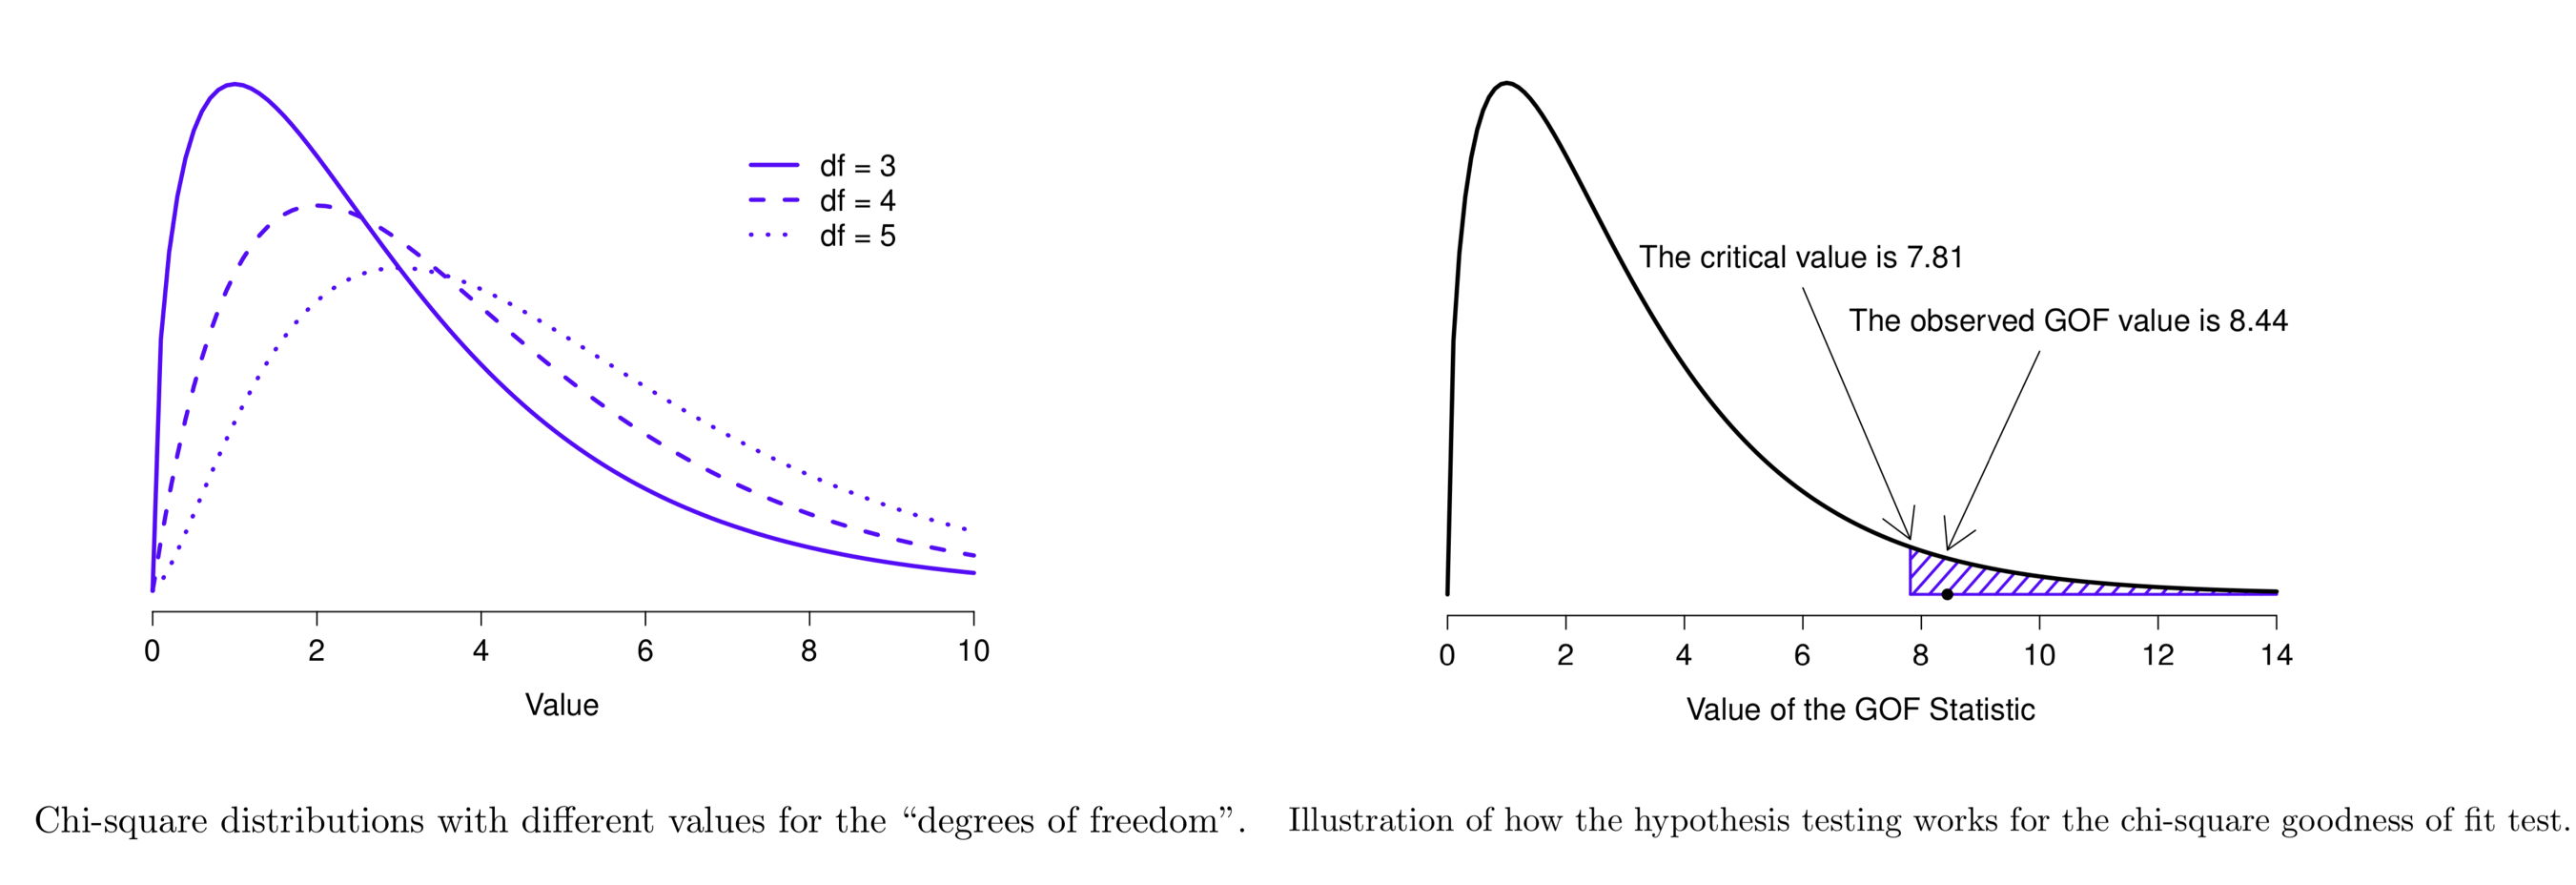

### Example

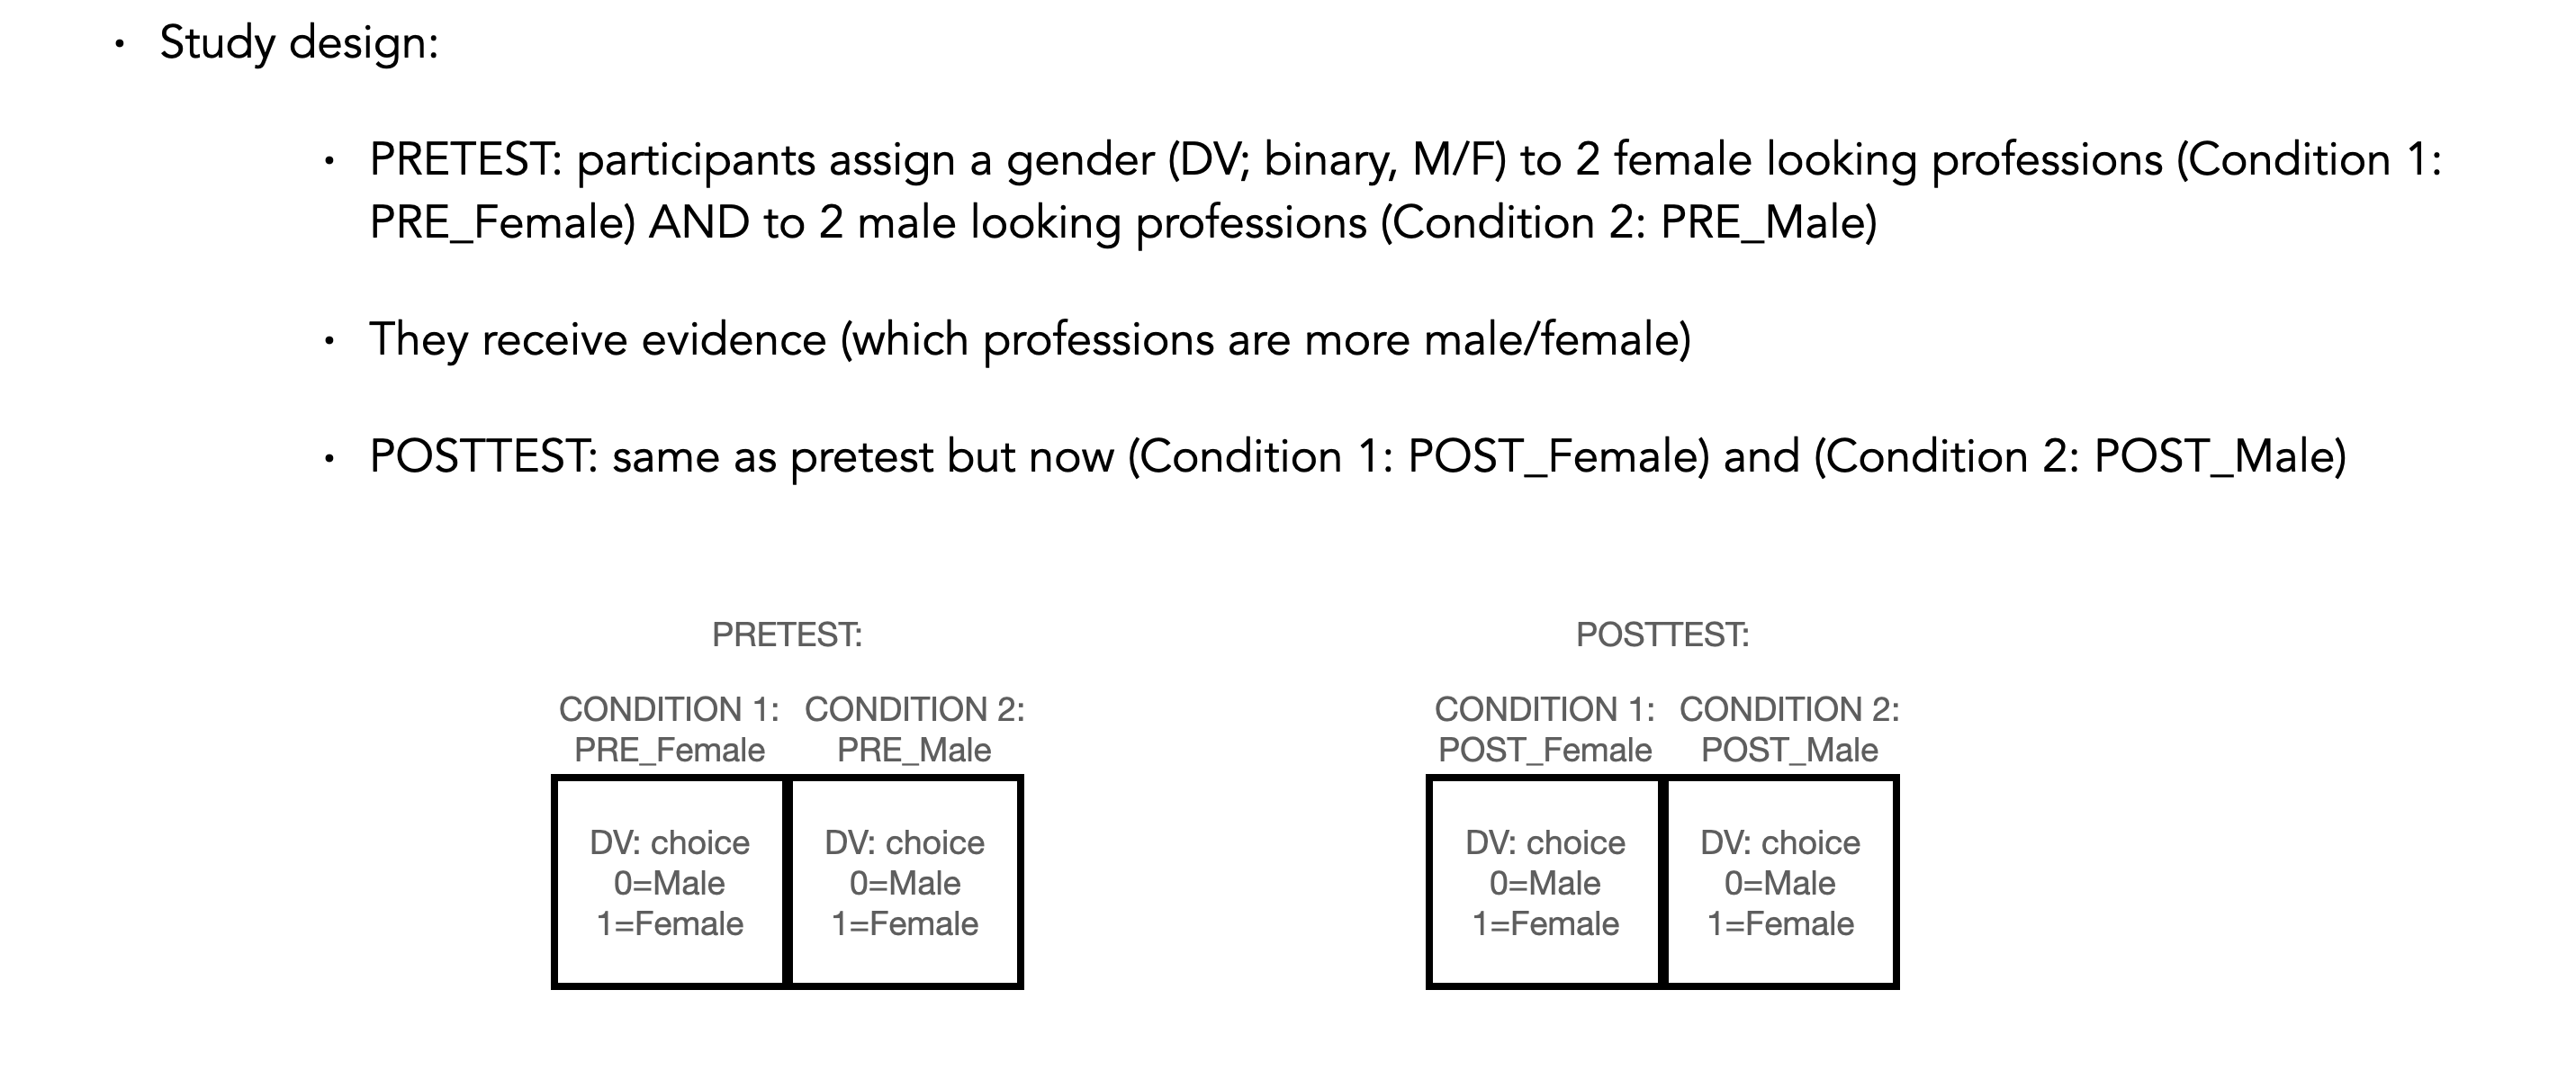

The variable "PRE_female" encodes whether participants chose a man (PRE_female==0) or a woman (PRE_female==1) at pretest, in the female condition of this experiment. Since the choice is binary, the chance level of choosing a woman is 0.5. Let's see if participants chose women at chance (Null hypothesis) or if there was a bias towards choosing men (in which case we expect the mean of PRE_female to be < 0.5) or a bias towards choosing women (in which case we expect the mean of PRE_female to be > 0.5).

To test whether the proportion of men/women choices at pretest in Condition 1 is at chance level (comparing PRE_female to 0.5) we can run a (one way) chi square test.

In [3]:
# first let's look at the mean of the variable, which indicates percent women chosen

df['PRE_female'].mean()

0.38846153846153847

In [4]:
# we can also compute the standard deviation of the proportion

df['PRE_female'].std()

0.4883404432118925

/var/folders/53/6ypqgtmd38ggqwb6vvtqdz6h0000gp/T/ipykernel_43738/3444304390.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["PRE_female"], ax=ax[1])


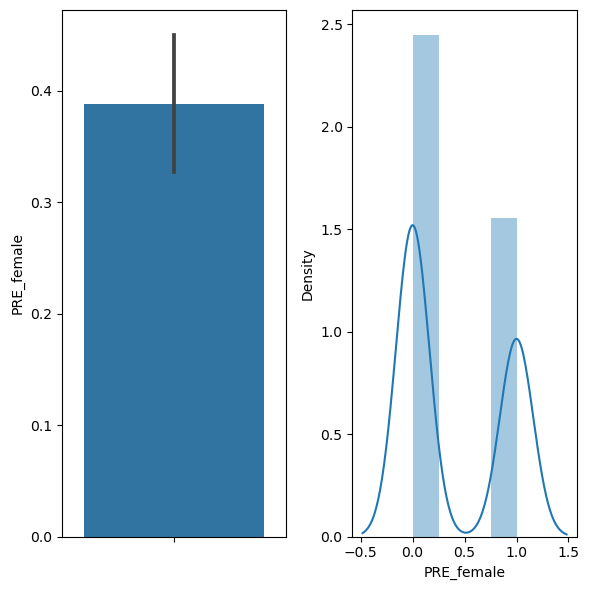

In [5]:
# we can also visualize the proportion, by plotting a bargraph and a histogram of the data

fig, ax = plt.subplots(1,2, figsize=(6,6))
sns.barplot(y="PRE_female", data=df, ax=ax[0])
sns.distplot(df["PRE_female"], ax=ax[1])
plt.tight_layout()

In [6]:
# the variable "PRE_female" is a Series of 1s and 0s

df["PRE_female"]

0      1
1      0
2      1
3      1
4      0
      ..
255    0
256    1
257    1
258    0
259    0
Name: PRE_female, Length: 260, dtype: int64

In [7]:
type(df["PRE_female"][0])

numpy.int64

In [8]:
# this is how you see what type of variables are in your data (in each column)

df.dtypes.to_dict()

{'Unnamed: 0': dtype('int64'),
 'PRE_male': dtype('int64'),
 'PRE_female': dtype('int64'),
 'POST_male': dtype('int64'),
 'POST_female': dtype('int64'),
 'POST_male_salary': dtype('int64'),
 'POST_female_salary': dtype('int64'),
 'POST_male_friendly': dtype('float64'),
 'POST_female_friendly': dtype('float64'),
 'POST_male_intelligent': dtype('float64'),
 'POST_female_intelligent': dtype('float64'),
 'Hire_m': dtype('int64'),
 'Hire_f': dtype('int64'),
 'Choice_m': dtype('int64'),
 'Choice_f': dtype('int64'),
 'itemnum': dtype('int64'),
 'partnum': dtype('int64'),
 'Gender': dtype('O'),
 'Ide': dtype('int64'),
 'Political': dtype('O'),
 'Edu': dtype('O')}

In [9]:
# the chisquare test expects as input the observed frequencies in each category
# to compute this we can use numpy's function bincount, which counts how many 0s and how many 1s are in the "PRE_female" Series

np.bincount(df["PRE_female"])

array([159, 101])

In [10]:
# the chisquare test expects as input the observed frequencies in each category
# to compute this we can use panda's function value_counts, which is the same as bincounts but can handle strings not just numebrs

df["PRE_female"].value_counts()

0    159
1    101
Name: PRE_female, dtype: int64

In [11]:
# now we can run the chisquare test on the count of the categories computed above
# by default, chisquare compares the counts to the Null in which the categories are equally likely
# so in this case, it tests whether the 159 0s and 101 1s are significantly different from 130 0s and 130 1s, or in other words, a 50% incidence rate
# it reports the chi square statistic and the p value

chisquare(np.bincount(df["PRE_female"]))

Power_divergenceResult(statistic=12.938461538461539, pvalue=0.00032189944909632355)

In [12]:
# now we can run the chisquare test on the count of the categories computed above
# by default, chisquare compares the counts to the Null in which the categories are equally likely
# so in this case, it tests whether the 159 0s and 101 1s are significantly different from 130 0s and 130 1s, or in other words, a 50% incidence rate
# it reports the chi square statistic and the p value

chisquare(df["PRE_female"].value_counts())

Power_divergenceResult(statistic=12.938461538461539, pvalue=0.00032189944909632355)

In [13]:
# if you need the effect size of the test you can use the following formula:

res = chisquare(np.bincount(df["PRE_female"]))
np.sqrt(res.statistic/len(df))

0.2230769230769231

Reporting result:

"At pretest in Condition 1, participants chose women (Mean=38%) significantlty less than expected by chance (50%), χ2=12.93, w=0.22, P<0.001."

## Independent proportions chi square

Chi square test of independence tests if two proportions are different from each other

The variable "PRE_female" encodes whether participants chose a man (PRE_female==0) or a woman (PRE_female==1) at pretest, in the female condition of this experiment.

The variable "PRE_female" encodes whether participants chose a man (PRE_male==0) or a woman (PRE_male==1) at pretest, in the male condition of this experiment.

To test whether the proportion of men/women choices are different in the male versus female conditions (comparing the PRE_female proportion to the PRE_male proportion) we can run a (two way) chi square test (or a chi square test of independence).

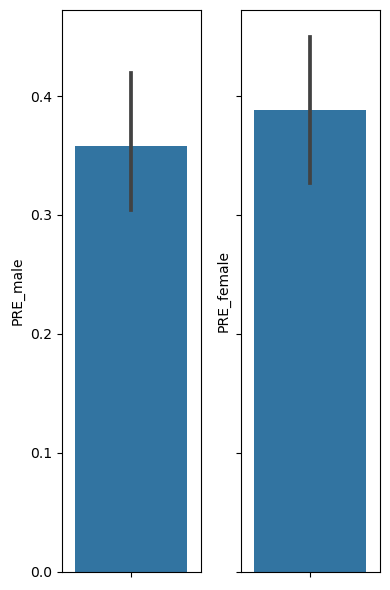

In [14]:
# Let's first visualize the 2 proportions we want to compare, by plotting a bargraph of each

fig, ax = plt.subplots(1,2, figsize=(4,6), sharey=True)
sns.barplot(y="PRE_male", data=df, ax=ax[0])
sns.barplot(y="PRE_female", data=df, ax=ax[1])
plt.tight_layout()

In [15]:
# the chisquare test expects as input the observed frequencies in each category
# to compute this we can use Panda's function crosstab, which counts how many 0s and how many 1s are in the "PRE_female" Series and how many are in the "PRE_female" Series

pd.crosstab(df["PRE_male"], df["PRE_female"])

PRE_female,0,1
PRE_male,,
0,104,63
1,55,38


In [16]:
# main chi square test of independence
# reports test statistic, p value, df

stats.chi2_contingency(pd.crosstab(df["PRE_male"], df["PRE_female"]))

Chi2ContingencyResult(statistic=0.13285927016061816, pvalue=0.7154856772979994, dof=1, expected_freq=array([[102.12692308,  64.87307692],
       [ 56.87307692,  36.12692308]]))

In [17]:
# do this fisher_exact test instead if your data has small frequencies (<5 obs/cell)
# now we can run the two way chi square on this frequency table
# output is chi square statistic and p value

stats.fisher_exact(pd.crosstab(df["PRE_male"], df["PRE_female"]))

SignificanceResult(statistic=1.1405483405483405, pvalue=0.6907062188741226)

In [18]:
df['PRE_female'].mean()

0.38846153846153847

In [19]:
df['PRE_male'].mean()

0.3576923076923077

In [20]:
df['PRE_male'].std()

0.48024533379886347

In [21]:
df['PRE_female'].std()

0.4883404432118925

Reporting result:

"The proportion of women chosen at pretest in the male condition (M=35.7%) was not significantly different (χ2=1.14, P=0.69) from the proportion of women chosen at pretest in the female condition (M=38.8%)."

### Another example:

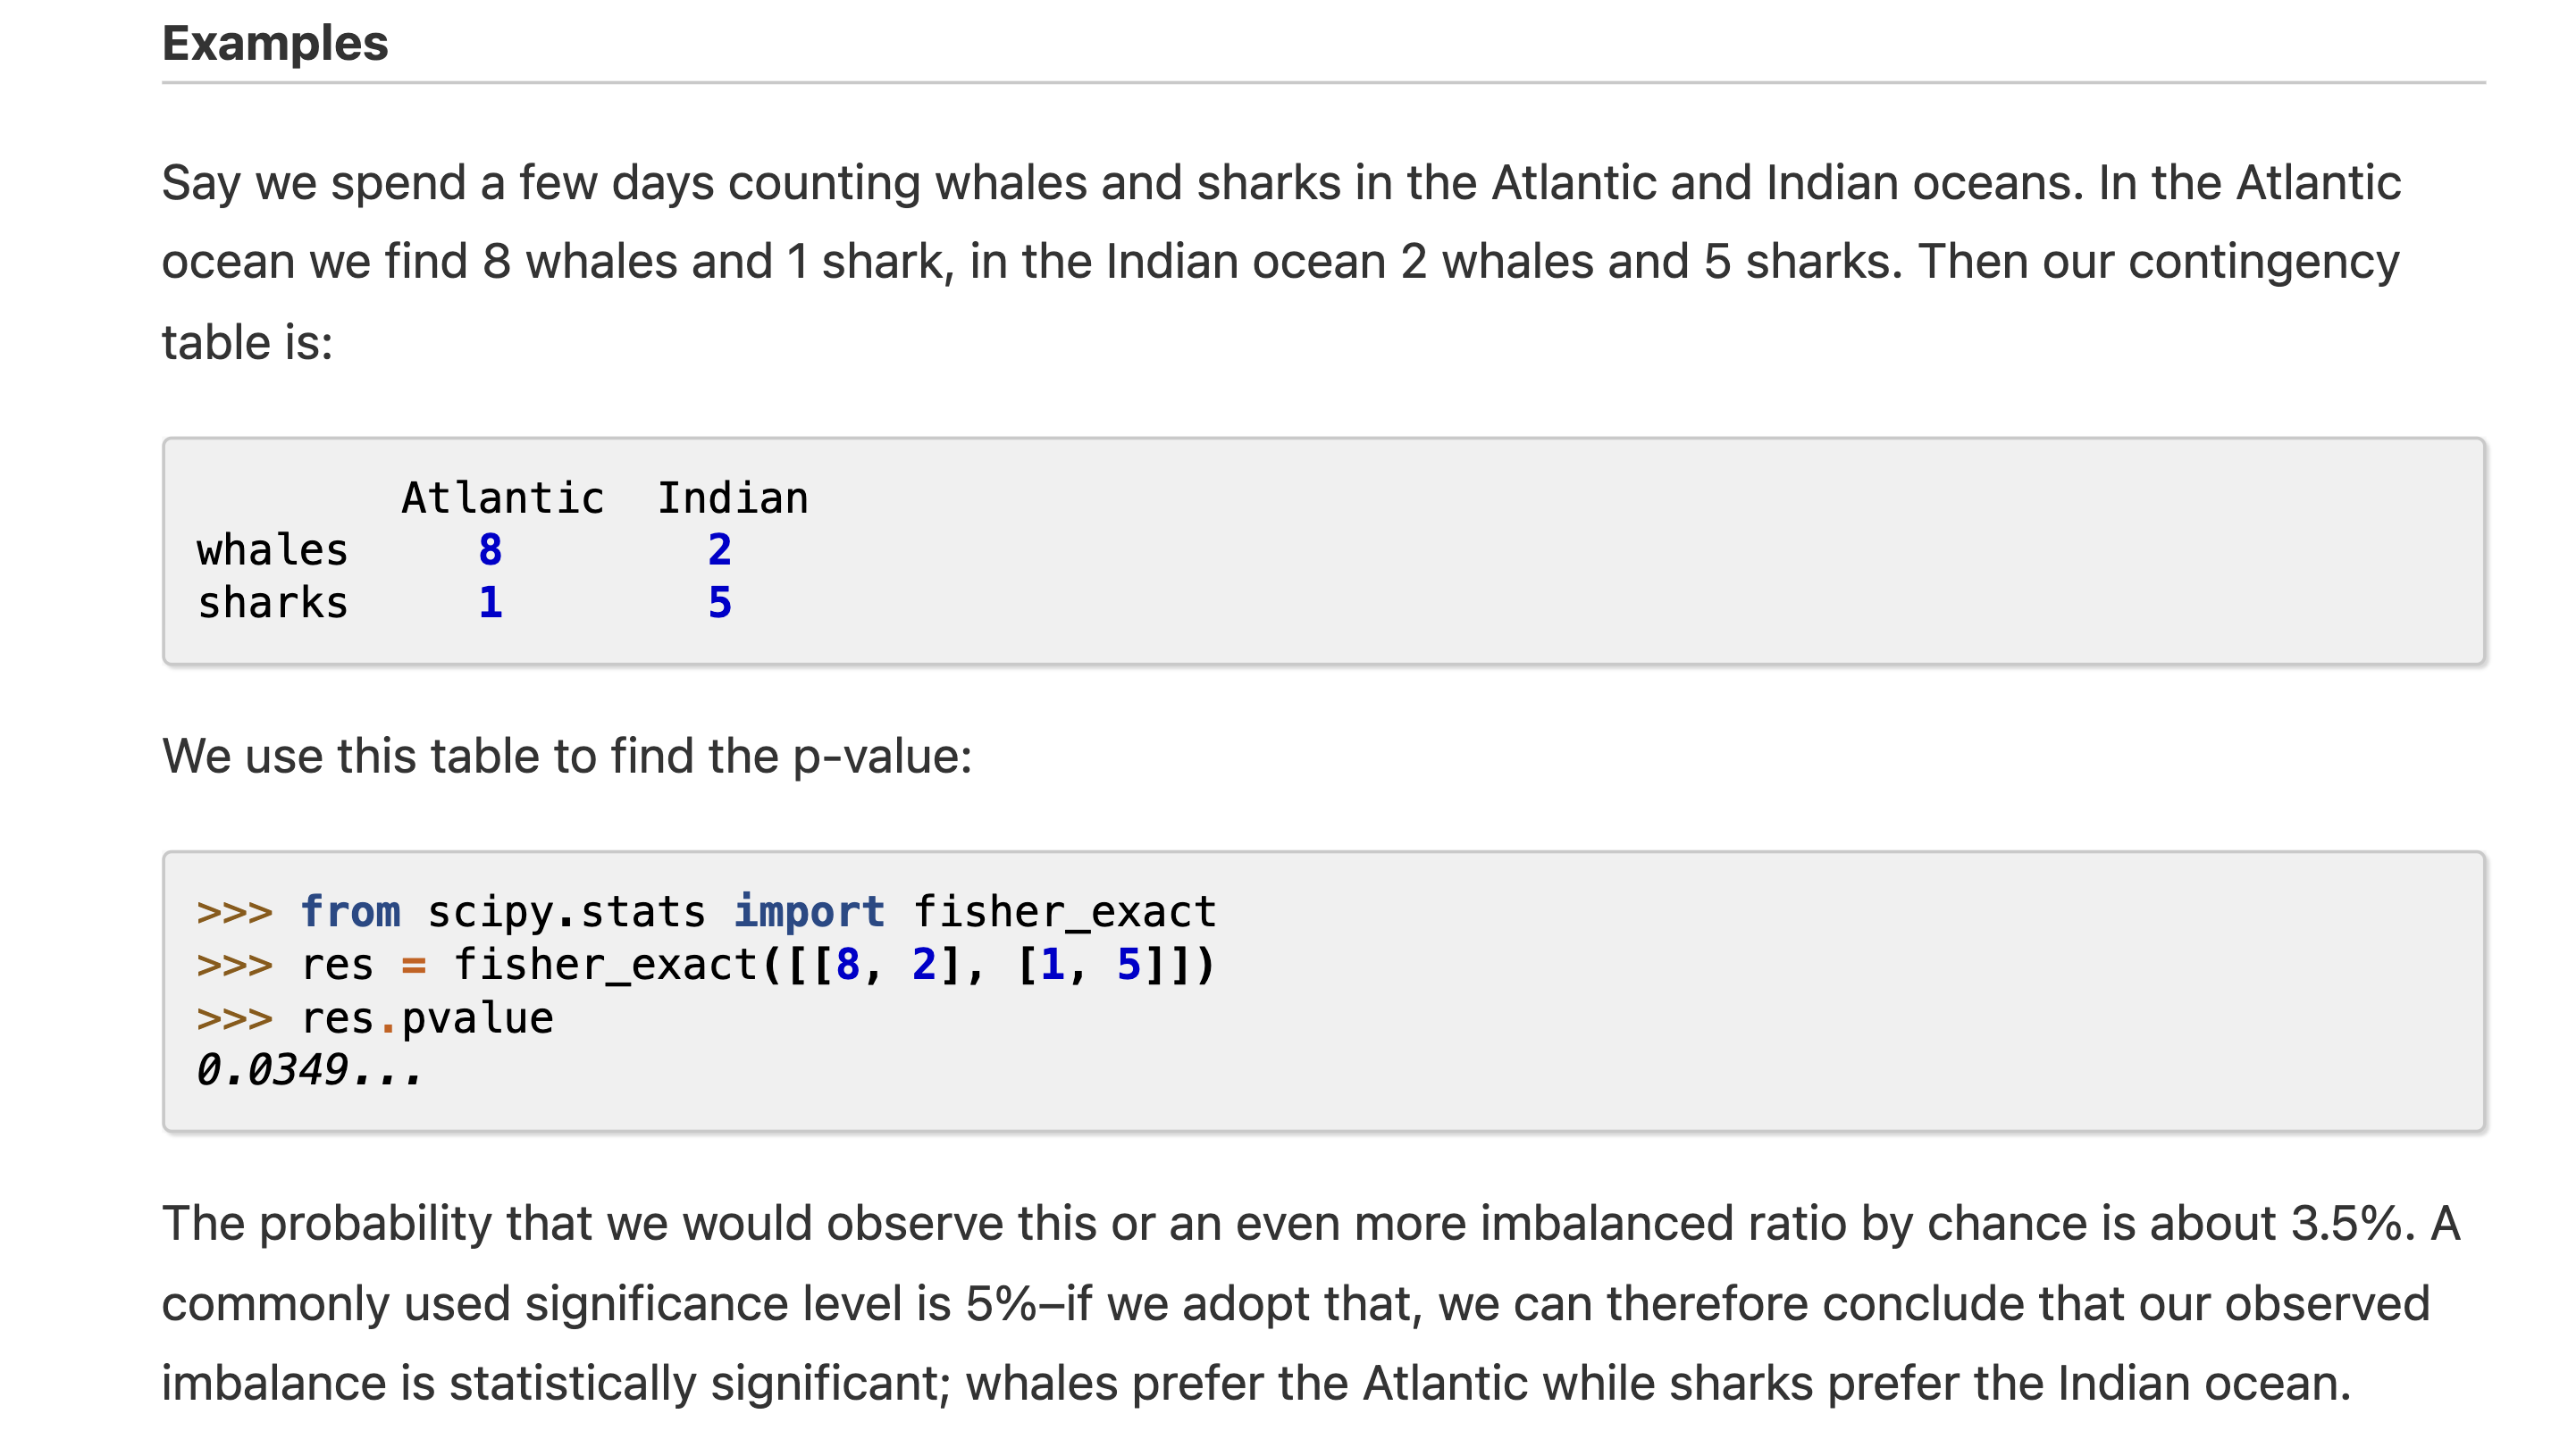

## Repeated measures chi square -- McNemar test

McNemar test of marginal homogeneity is a chi square test of independence for non-independent observations (e.g., test-retest / pre-post / before-after designs)

The variable "PRE_female" encodes whether participants chose a man (PRE_female==0) or a woman (PRE_female==1) at pretest, in the female condition of this experiment.

The variable "POST_female" encodes whether the same participants chose a man (POST_female==0) or a woman (POST_female==1) at posttest, in the female condition of this experiment.

To test whether the proportion of men/women choices are different in the pretest versus posttest measures for the same participants (comparing the PRE_female proportion to the POST_female proportion) we can run a repeated measures chi square test (or a chi square test of independence for repeated measures, or a McNemar tests).

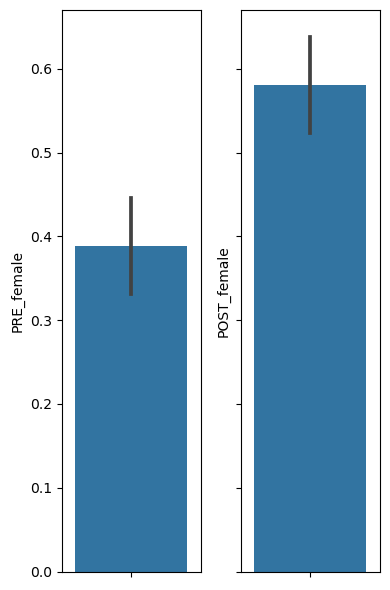

In [22]:
# Let's first visualize the 2 proportions we want to compare, by plotting a bargraph of each

fig, ax = plt.subplots(1,2, figsize=(4,6), sharey=True)
sns.barplot(y="PRE_female", data=df, ax=ax[0])
sns.barplot(y="POST_female", data=df, ax=ax[1])
plt.tight_layout()

In [23]:
# the chisquare test expects as input the observed frequencies in each category
# to compute this we can use Panda's function crosstab, which counts how many 0s and how many 1s are in the "PRE_female" Series and how many are in the "POST_female" Series

pd.crosstab(df["PRE_female"], df["POST_female"])

POST_female,0,1
PRE_female,,
0,85,74
1,24,77


In [24]:
# now we can run the McNemar test on this frequency table
# output is chi square statistic and p value

print(mcnemar(pd.crosstab(df["PRE_female"], df["POST_female"])))

pvalue      4.2159207369916054e-07
statistic   24.0


In [25]:
df["PRE_female"].mean()

0.38846153846153847

In [26]:
df["PRE_female"].std()

0.4883404432118925

In [27]:
df["POST_female"].mean()

0.5807692307692308

In [28]:
df["POST_female"].std()

0.4943848646716376

Reporting result:

"The proportion of women chosen at posttest in the female condition (M=58%) was significantly higher (χ2=24, P<0.001) than the proportion of women chosen at pretest in the female condition (M=38.8%)."

## Power

the probability of detecting a significant effect, given that the effect is real

The power is affected by at least three factors:
- Signicance level (α, typically 0.05): the higher the significance level, the higher the power
- Sample size (n): the greater the sample size, the greater the power
- Effect size (ES): the greater the effect size, the greater power
- Other: the tests methods, distribution of predictors, missing data

Compute power: WebPower: https://webpower.psychstat.org/wiki/models/index

Report power analysis:

"For a power analysis we used the software webpower (Zhang & Yuan, 2018), and we calculated that in order to detect an effect of at least 0.2, at a significance level of 0.05, in a two sided comparison, with a power of 0.95, we need a sample size of 325 observations (participants).”
